<h1> Base de données sur les voitures d'occasions </h1>

*Importation des différentes bibliothèsques*

In [424]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

*Importation du DataFrame*

In [ ]:
cars_data="C:/Users/louis/Downloads/archive (23)/used_cars_data.csv"
df=pd.read_csv(cars_data)

C:\Users\louis\AppData\Local\Temp\ipykernel_79736\2793615263.py:3: DtypeWarning: Columns (0: dealer_zip) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(cars_data)


*Réduction du DataFrame*

In [394]:
df = df[df["bed"].isna()]
df = df[df["cabin"].isna()]
df = df[df["frame_damaged"] != True]
df = df[df["has_accidents"] != True]
df = df[df["isCab"] != True]
df = df[~df["main_picture_url"].isna()]
df = df[(df["owner_count"].isna()) | (df["owner_count"] == 1)]
df = df[df["salvage"] != True]
df = df[df["theft_title"] != True]
df = df[df["daysonmarket"] < 365]

df = df.drop(["bed", "bed_height", "cabin", "city", "dealer_zip",
              "description", "exterior_color", "has_accidents", "interior_color",
              "isCab", "frame_damaged", "latitude", "longitude", "main_picture_url", "owner_count",
              "is_certified", "is_cpo", "salvage", "savings_amount", "seller_rating", "sp_id", "theft_title",
              "vehicle_damage_category"], axis=1)

In [395]:
new_df= df.sample(frac=0.5, random_state=28)

*Affichage des informations essentielles du DataFrame*

In [396]:
new_df.info()

<class 'pandas.DataFrame'>
Index: 907164 entries, 245312 to 1520656
Data columns (total 43 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vin                   907164 non-null  str    
 1   back_legroom          860816 non-null  str    
 2   bed_length            127546 non-null  str    
 3   body_type             902421 non-null  str    
 4   city_fuel_economy     770602 non-null  float64
 5   combine_fuel_economy  0 non-null       float64
 6   daysonmarket          907164 non-null  int64  
 7   engine_cylinders      878441 non-null  str    
 8   engine_displacement   854054 non-null  float64
 9   engine_type           878441 non-null  str    
 10  fleet                 338515 non-null  object 
 11  franchise_dealer      907164 non-null  bool   
 12  franchise_make        827156 non-null  str    
 13  front_legroom         860816 non-null  str    
 14  fuel_tank_volume      860816 non-null  str    
 15  fuel_type 

*Séparation du DataFrame en un ensemble d'entraînement et un ensemble de test*

In [427]:
df_train, df_test = train_test_split(new_df, test_size=0.2, random_state=28)

*Affichage des premières lignes de l'ensemble de train*

In [428]:
df_train.head()

,vin,back_legroom,bed_length,body_type,city_fuel_economy,combine_fuel_economy,daysonmarket,engine_cylinders,engine_displacement,engine_type,...,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year
248672,3GKALTEV0JL400084,39.7 in,NaN,SUV / Crossover,24.0,NaN,13,I4,2000.0,I4,...,"260 lb-ft @ 2,000 RPM",A,9-Speed Automatic,t73719,SLE AWD,4WD,Four-Wheel Drive,107.3 in,72.4 in,2018
1739676,JN8AY2NF7L9360716,41 in,NaN,SUV / Crossover,14.0,NaN,291,V8,5600.0,V8,...,"394 lb-ft @ 4,000 RPM",A,Automatic,t89243,Platinum RWD,4X2,4X2,121.1 in,79.9 in,2020
886500,3C63RRML5LG212301,43.1 in,76.3 in,Pickup Truck,NaN,NaN,73,I6 Diesel,6700.0,I6 Diesel,...,"850 lb-ft @ 1,700 RPM",A,Automatic,t89891,Laramie Mega Cab DRW 4WD,4WD,Four-Wheel Drive,160.4 in,96.5 in,2020
1241791,2FMGK5C83KBA36396,44.3 in,NaN,SUV / Crossover,16.0,NaN,289,V6,3500.0,V6,...,"254 lb-ft @ 4,000 RPM",A,6-Speed Automatic,t78252,SEL FWD,FWD,Front-Wheel Drive,117.9 in,88.8 in,2019
1350274,KM8K62AAXMU607737,34.6 in,NaN,SUV / Crossover,27.0,NaN,13,I4,2000.0,I4,...,"132 lb-ft @ 4,500 RPM",A,6-Speed Automatic,t93947,SEL Plus FWD,FWD,Front-Wheel Drive,102.4 in,70.9 in,2021


*Affichage des informations essentielles de l'ensemble de train*

In [429]:
df_train.info()

<class 'pandas.DataFrame'>
Index: 725731 entries, 248672 to 1645669
Data columns (total 43 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vin                   725731 non-null  str    
 1   back_legroom          688612 non-null  str    
 2   bed_length            102165 non-null  str    
 3   body_type             721982 non-null  str    
 4   city_fuel_economy     616433 non-null  float64
 5   combine_fuel_economy  0 non-null       float64
 6   daysonmarket          725731 non-null  int64  
 7   engine_cylinders      702620 non-null  str    
 8   engine_displacement   683160 non-null  float64
 9   engine_type           702620 non-null  str    
 10  fleet                 270750 non-null  object 
 11  franchise_dealer      725731 non-null  bool   
 12  franchise_make        661887 non-null  str    
 13  front_legroom         688612 non-null  str    
 14  fuel_tank_volume      688612 non-null  str    
 15  fuel_type 

*Affichage des premières lignes de l'ensemble de test*

In [400]:
df_test.head()

,vin,back_legroom,bed_length,body_type,city_fuel_economy,combine_fuel_economy,daysonmarket,engine_cylinders,engine_displacement,engine_type,...,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year
1061749,WBAJR3C06LWW68004,36.5 in,NaN,Sedan,25.0,NaN,27,I4,2000.0,I4,...,"258 lb-ft @ 1,500 RPM",A,Automatic,t86961,530i Sedan RWD,RWD,Rear-Wheel Drive,117.1 in,83.7 in,2020
1873988,5TDGZRBH5LS055038,41 in,NaN,SUV / Crossover,20.0,NaN,0,V6,3500.0,V6,...,"263 lb-ft @ 4,700 RPM",A,Automatic,t90136,XLE AWD,AWD,All-Wheel Drive,112.2 in,76 in,2020
2026855,1C4HJXDG4MW504649,38.3 in,NaN,SUV / Crossover,NaN,NaN,7,V6,3000.0,V6,...,"442 lb-ft @ 1,400 RPM",A,Automatic,t94166,Sport S 4WD,4WD,Four-Wheel Drive,118.4 in,73.8 in,2021
95514,3C63RRAL2LG219758,--,98.3 in,Pickup Truck,NaN,NaN,55,I6 Diesel,6700.0,I6 Diesel,...,"850 lb-ft @ 1,700 RPM",A,Automatic,t89899,Tradesman LB DRW 4WD,4WD,Four-Wheel Drive,140.2 in,96.5 in,2020
1832098,3GKALXEX1LL329957,39.7 in,NaN,SUV / Crossover,21.0,NaN,20,I4,2000.0,I4,...,"260 lb-ft @ 2,000 RPM",A,9-Speed Automatic,t85774,Denali AWD,4WD,Four-Wheel Drive,107.3 in,72.4 in,2020


*Affichage des informations essentielles de l'ensemble de test*

In [401]:
df_test.info()

<class 'pandas.DataFrame'>
Index: 181433 entries, 1061749 to 1252169
Data columns (total 43 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vin                   181433 non-null  str    
 1   back_legroom          172204 non-null  str    
 2   bed_length            25381 non-null   str    
 3   body_type             180439 non-null  str    
 4   city_fuel_economy     154169 non-null  float64
 5   combine_fuel_economy  0 non-null       float64
 6   daysonmarket          181433 non-null  int64  
 7   engine_cylinders      175821 non-null  str    
 8   engine_displacement   170894 non-null  float64
 9   engine_type           175821 non-null  str    
 10  fleet                 67765 non-null   object 
 11  franchise_dealer      181433 non-null  bool   
 12  franchise_make        165269 non-null  str    
 13  front_legroom         172204 non-null  str    
 14  fuel_tank_volume      172204 non-null  str    
 15  fuel_type

*Affichage des statistiques descriptives de l'ensemble de train*

In [402]:
df_train.describe()

,city_fuel_economy,combine_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,listing_id,mileage,price,year
count,616433.000000,0.0,725731.000000,683160.000000,616433.000000,683160.000000,7.257310e+05,6.887090e+05,7.257310e+05,725731.000000
mean,23.369592,NaN,76.770641,2844.646935,29.967930,246.263517,2.755250e+08,1.508164e+04,3.326966e+04,2018.872599
std,9.442655,NaN,85.618892,1301.904870,8.069022,90.822415,6.593416e+06,2.907069e+04,1.880159e+04,3.161209
min,8.000000,NaN,0.000000,700.000000,11.000000,55.000000,2.518498e+08,0.000000e+00,7.000000e+02,1915.000000
25%,18.000000,NaN,18.000000,2000.000000,25.000000,174.000000,2.736029e+08,5.000000e+00,2.199000e+04,2018.000000
50%,22.000000,NaN,41.000000,2500.000000,29.000000,240.000000,2.780601e+08,1.200000e+01,2.916800e+04,2020.000000
75%,26.000000,NaN,94.000000,3500.000000,33.000000,300.000000,2.801683e+08,2.217300e+04,4.097700e+04,2020.000000
max,127.000000,NaN,364.000000,8400.000000,127.000000,903.000000,2.820222e+08,1.111111e+06,2.175000e+06,2021.000000


*Affichage des statistiques descriptives de l'ensemble de test*

In [403]:
df_test.describe()

,city_fuel_economy,combine_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,listing_id,mileage,price,year
count,154169.000000,0.0,181433.000000,170894.000000,154169.000000,170894.000000,1.814330e+05,1.722290e+05,181433.000000,181433.000000
mean,23.317100,NaN,76.669867,2843.623533,29.927087,246.055496,2.755326e+08,1.505495e+04,33214.389402,2018.894810
std,9.218831,NaN,85.472976,1300.417460,7.919619,90.764879,6.581408e+06,2.897845e+04,18071.170765,2.972378
min,9.000000,NaN,0.000000,700.000000,11.000000,70.000000,2.518903e+08,0.000000e+00,484.000000,1923.000000
25%,18.000000,NaN,18.000000,2000.000000,25.000000,174.000000,2.736056e+08,4.000000e+00,21990.000000,2018.000000
50%,22.000000,NaN,41.000000,2500.000000,29.000000,240.000000,2.780657e+08,1.200000e+01,29097.000000,2020.000000
75%,26.000000,NaN,94.000000,3500.000000,33.000000,300.000000,2.801700e+08,2.220300e+04,40932.000000,2020.000000
max,127.000000,NaN,364.000000,8400.000000,127.000000,808.000000,2.819925e+08,1.111111e+06,985900.000000,2021.000000


*Graphiques représentant certaines variables numériques dans l'ensemble de train*

In [433]:
df_train.select_dtypes(include=["number"]).columns

Index(['city_fuel_economy', 'combine_fuel_economy', 'daysonmarket',
       'engine_displacement', 'highway_fuel_economy', 'horsepower',
       'listing_id', 'mileage', 'price', 'year'],
      dtype='str')

<Axes: >

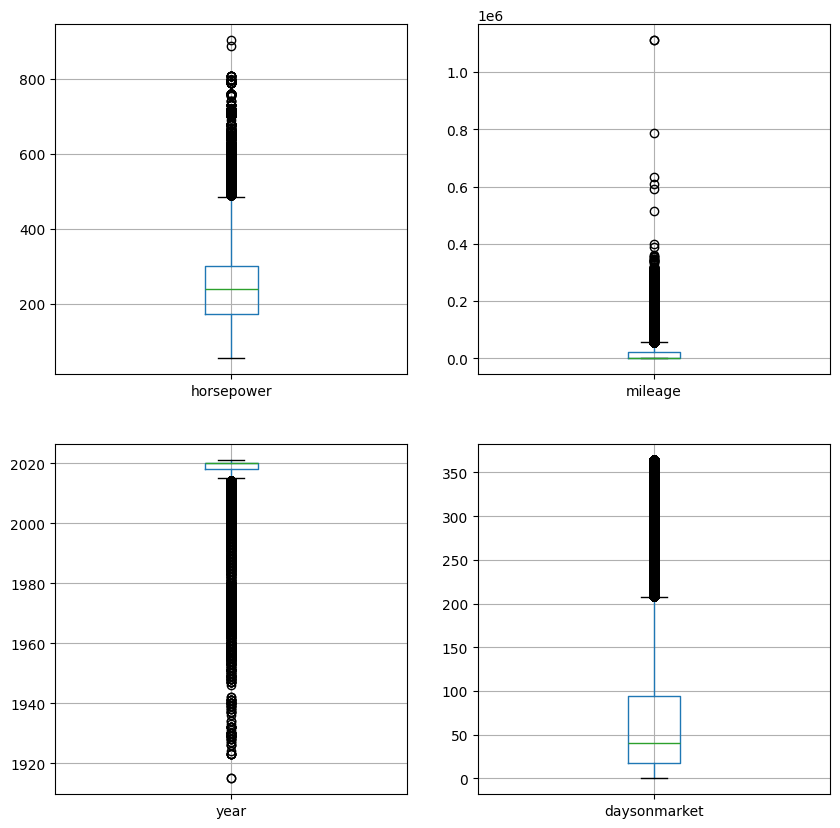

In [434]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

df_train.boxplot(column="horsepower", ax=axes[0,0])
df_train.boxplot(column="mileage", ax=axes[0,1])
df_train.boxplot(column="year", ax=axes[1,0])
df_train.boxplot(column="daysonmarket", ax=axes[1,1])

*Graphiques représentant certaines variables cathégorielles dans l'ensemble de train*

In [435]:
df_train.select_dtypes(include=["category","object", "string"]).columns

Index(['vin', 'back_legroom', 'bed_length', 'body_type', 'engine_cylinders',
       'engine_type', 'fleet', 'franchise_make', 'front_legroom',
       'fuel_tank_volume', 'fuel_type', 'height', 'is_oemcpo', 'length',
       'listed_date', 'listing_color', 'major_options', 'make_name',
       'maximum_seating', 'model_name', 'power', 'sp_name', 'torque',
       'transmission', 'transmission_display', 'trimId', 'trim_name',
       'wheel_system', 'wheel_system_display', 'wheelbase', 'width'],
      dtype='str')

<Axes: xlabel='fuel_type'>

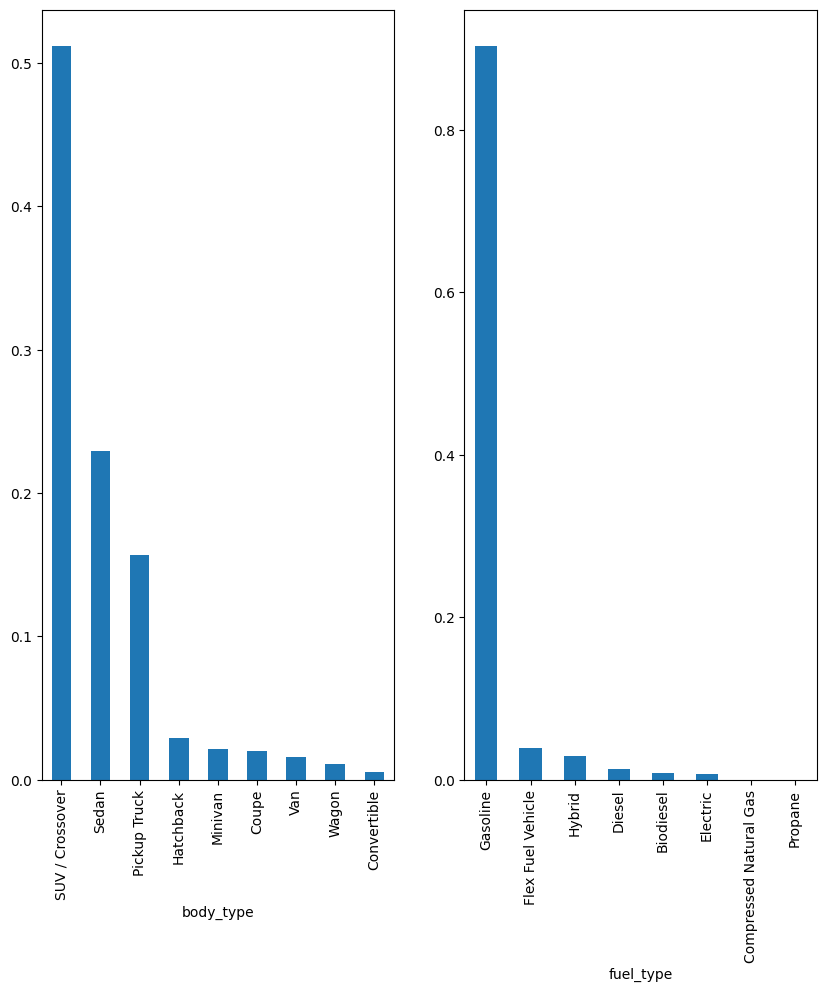

In [446]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
df_train['body_type'].value_counts(normalize=True).plot(kind='bar', ax=axes[0])
df_train['fuel_type'].value_counts(normalize=True).plot(kind='bar', ax=axes[1])

In [447]:
df_train.columns

Index(['vin', 'back_legroom', 'bed_length', 'body_type', 'city_fuel_economy',
       'combine_fuel_economy', 'daysonmarket', 'engine_cylinders',
       'engine_displacement', 'engine_type', 'fleet', 'franchise_dealer',
       'franchise_make', 'front_legroom', 'fuel_tank_volume', 'fuel_type',
       'height', 'highway_fuel_economy', 'horsepower', 'is_new', 'is_oemcpo',
       'length', 'listed_date', 'listing_color', 'listing_id', 'major_options',
       'make_name', 'maximum_seating', 'mileage', 'model_name', 'power',
       'price', 'sp_name', 'torque', 'transmission', 'transmission_display',
       'trimId', 'trim_name', 'wheel_system', 'wheel_system_display',
       'wheelbase', 'width', 'year'],
      dtype='str')

*Suppression des variables non-pertinentes*

In [448]:
df_train=df_train.drop(columns=['vin', 'listing_id', 'trimId', 'sp_name','model_name', 'trim_name', 'major_options','transmission_display', 'wheel_system_display','listed_date'])
df_train.head()

,back_legroom,bed_length,body_type,city_fuel_economy,combine_fuel_economy,daysonmarket,engine_cylinders,engine_displacement,engine_type,fleet,...,maximum_seating,mileage,power,price,torque,transmission,wheel_system,wheelbase,width,year
248672,39.7 in,NaN,SUV / Crossover,24.0,NaN,13,I4,2000.0,I4,False,...,5 seats,23486.0,"252 hp @ 5,500 RPM",24205.0,"260 lb-ft @ 2,000 RPM",A,4WD,107.3 in,72.4 in,2018
1739676,41 in,NaN,SUV / Crossover,14.0,NaN,291,V8,5600.0,V8,NaN,...,8 seats,10.0,"390 hp @ 5,800 RPM",57277.0,"394 lb-ft @ 4,000 RPM",A,4X2,121.1 in,79.9 in,2020
886500,43.1 in,76.3 in,Pickup Truck,NaN,NaN,73,I6 Diesel,6700.0,I6 Diesel,NaN,...,6 seats,0.0,"370 hp @ 2,800 RPM",67169.0,"850 lb-ft @ 1,700 RPM",A,4WD,160.4 in,96.5 in,2020
1241791,44.3 in,NaN,SUV / Crossover,16.0,NaN,289,V6,3500.0,V6,NaN,...,7 seats,3.0,"287 hp @ 6,500 RPM",39500.0,"254 lb-ft @ 4,000 RPM",A,FWD,117.9 in,88.8 in,2019
1350274,34.6 in,NaN,SUV / Crossover,27.0,NaN,13,I4,2000.0,I4,NaN,...,5 seats,3.0,"147 hp @ 6,200 RPM",23410.0,"132 lb-ft @ 4,500 RPM",A,FWD,102.4 in,70.9 in,2021


*Identification des variables numériques dans notre DataFrame*

In [449]:
num_columns=df_train.select_dtypes(include=['int', 'float']).columns
num_columns

Index(['city_fuel_economy', 'combine_fuel_economy', 'daysonmarket',
       'engine_displacement', 'highway_fuel_economy', 'horsepower', 'mileage',
       'price', 'year'],
      dtype='str')

*Pourcentages des valeurs manquantes pour les variables numériques de notre DataFrame*

In [406]:
df_train[num_columns].isna().mean().sort_values(ascending=False)*100

combine_fuel_economy    100.000000
city_fuel_economy        15.060401
highway_fuel_economy     15.060401
engine_displacement       5.865948
horsepower                5.865948
mileage                   5.101339
daysonmarket              0.000000
listing_id                0.000000
price                     0.000000
year                      0.000000
dtype: float64

*Traitement des variables manquantes pour les variables numériques de notre DataFrame*

In [450]:
df_train=df_train.drop("combine_fuel_economy", axis=1)

imp = SimpleImputer(missing_values=np.nan, strategy='median')

num_columns = df_train.select_dtypes(include=["number"]).columns
df_train[num_columns] = imp.fit_transform(df_train[num_columns])

*Vérification qu'il n'existe plus de valeurs manquantes dans les variables numériques de notre DataFrame*

In [451]:
df_train[num_columns].isna().mean().sort_values(ascending=False)*100

city_fuel_economy       0.0
daysonmarket            0.0
engine_displacement     0.0
highway_fuel_economy    0.0
horsepower              0.0
mileage                 0.0
price                   0.0
year                    0.0
dtype: float64

*Identification des variables cathégorielles dans notre DataFrame*

In [452]:
cat_columns = df_train.select_dtypes(include=['object','category']).columns
cat_columns

C:\Users\louis\AppData\Local\Temp\ipykernel_79736\975650267.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_columns = df_train.select_dtypes(include=['object','category']).columns


Index(['back_legroom', 'bed_length', 'body_type', 'engine_cylinders',
       'engine_type', 'fleet', 'franchise_make', 'front_legroom',
       'fuel_tank_volume', 'fuel_type', 'height', 'is_oemcpo', 'length',
       'listing_color', 'make_name', 'maximum_seating', 'power', 'torque',
       'transmission', 'wheel_system', 'wheelbase', 'width'],
      dtype='str')

*Pourcentages des valeurs manquantes pour les variables cathégorielles de notre DataFrame*

In [453]:
df_train[cat_columns].isna().mean().sort_values(ascending=False)*100

is_oemcpo           94.964663
bed_length          85.922470
fleet               62.692788
torque              19.067809
power               17.957893
franchise_make       8.797199
wheelbase            5.114705
width                5.114705
maximum_seating      5.114705
back_legroom         5.114705
length               5.114705
height               5.114705
fuel_tank_volume     5.114705
front_legroom        5.114705
wheel_system         4.952524
engine_cylinders     3.184513
engine_type          3.184513
fuel_type            2.434097
transmission         1.935703
body_type            0.516583
listing_color        0.000000
make_name            0.000000
dtype: float64

*Transformation des variables chaines de caractères qui sont en réalités des numériques*

In [454]:
df_train['back_legroom'] = pd.to_numeric(df_train['back_legroom'].str.replace(" in", "", regex=False),errors="coerce")

df_train['front_legroom'] = pd.to_numeric(df_train['front_legroom'].str.replace(" in", "", regex=False),errors="coerce")

df_train['fuel_tank_volume'] = pd.to_numeric(df_train['fuel_tank_volume'].str.replace(" gal", "", regex=False),errors="coerce")

df_train['height'] = pd.to_numeric(df_train['height'].str.replace(" in", "", regex=False),errors="coerce")

df_train['maximum_seating'] = pd.to_numeric(df_train['maximum_seating'].str.replace(" seats", "", regex=False),errors="coerce")

df_train['width'] = pd.to_numeric(df_train['width'].str.replace(" in", "", regex=False),errors="coerce")

df_train['wheelbase'] = pd.to_numeric(df_train['wheelbase'].str.replace(" in", "", regex=False),errors="coerce") 

df_train['length'] = pd.to_numeric(df_train['length'].str.replace(" in", "", regex=False),errors="coerce") 

df_train["power"] = pd.to_numeric(df_train["power"].str.replace(r" hp.*", "", regex=True),errors="coerce")

df_train["torque"] = pd.to_numeric(df_train["torque"].str.replace(r" lb-ft.*", "", regex=True),errors="coerce")

*Traitement des variables manquantes pour ces variables devenues numériques*

In [455]:
cols_fix = ["back_legroom","front_legroom","fuel_tank_volume","height","maximum_seating","width","wheelbase", 'length', 'power', 'torque']

imp = SimpleImputer(strategy="median")
df_train[cols_fix] = imp.fit_transform(df_train[cols_fix])

*Vérification qu'il n'existe plus de valeurs manquantes dans ces variables devenues numériques de notre DataFrame*

In [456]:
df_train[cols_fix].isna().mean().sort_values(ascending=False)*100

back_legroom        0.0
front_legroom       0.0
fuel_tank_volume    0.0
height              0.0
maximum_seating     0.0
width               0.0
wheelbase           0.0
length              0.0
power               0.0
torque              0.0
dtype: float64

*Traitement des valeurs manquantes pour les variables cathégorielles dans notre DataFrame*

In [457]:
df_train=df_train.drop(['is_oemcpo','bed_length','fleet'], axis=1)

cat_cols = df_train.select_dtypes(include=["object","string", "category"]).columns
imp_cat = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

df_train[cat_cols] = imp_cat.fit_transform(df_train[cat_cols])

*Vérification qu'il n'y ai plus de valeurs manquantes dans les variables de types cathégorielles*

In [458]:
df_train[cat_cols].isna().mean().sort_values(ascending=False)*100

body_type           0.0
engine_cylinders    0.0
engine_type         0.0
franchise_make      0.0
fuel_type           0.0
listing_color       0.0
make_name           0.0
transmission        0.0
wheel_system        0.0
dtype: float64

*Traitement des variables manquantes pour les variables booléennes dans notre DataFrame*

*Identification des variables booléennes dans notre DataFrame*

In [459]:
bool_columns=df_train.select_dtypes(include='bool').columns
bool_columns

Index(['franchise_dealer', 'is_new'], dtype='str')

*Pourcentages des valeurs manquantes pour les variables booléennes de notre DataFrame*

In [460]:
df_train[bool_columns].isna().mean().sort_values(ascending=False)*100

franchise_dealer    0.0
is_new              0.0
dtype: float64

*Encodage des variables cathégorielles*

In [461]:
df_train.select_dtypes(include=['string','object','category']).columns

Index(['body_type', 'engine_cylinders', 'engine_type', 'franchise_make',
       'fuel_type', 'listing_color', 'make_name', 'transmission',
       'wheel_system'],
      dtype='str')

In [ ]:
cat_cols = ['body_type', 'engine_cylinders', 'engine_type', 'franchise_make',
       'fuel_type', 'listing_color', 'transmission', 'transmission_display',
       'wheel_system', 'wheel_system_display']

encoder = OneHotEncoder(handle_unknown="ignore")

encoded = encoder.fit_transform(df_train[cat_cols])

*Mise en forme des données pour l'entraînement*

In [421]:
y_train = df_train["price"].values
X_train = df_train.drop(columns=["price"]).values

y_test = df_test["price"].values
X_test = df_test.drop(columns=["price"]).values